In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Load preprocessed data
df = pd.read_csv('preprocessed_data.csv', index_col=0)

# Check if 'Label' column is present
print(df.head())
print(df.columns)

                                     0    1    2    3    4  5  6  7  8  9  \
Training/notumor/Tr-no_0276.jpg      0    0    0    0    0  0  0  0  0  0   
Training/glioma/Tr-gl_0048.jpg       1    1    1    1    1  1  1  1  2  2   
Training/pituitary/Tr-pi_0082.jpg    1    1    1    1    1  1  1  1  1  1   
Training/glioma/Tr-gl_0710.jpg       0    0    0    0    0  0  0  0  0  1   
Training/notumor/Tr-no_1456.jpg    255  255  255  255  255  9  9  9  8  8   

                                   ...  2491  2492  2493  2494  2495  2496  \
Training/notumor/Tr-no_0276.jpg    ...     0     0     0     0     0     0   
Training/glioma/Tr-gl_0048.jpg     ...     4     2     2     2     2     2   
Training/pituitary/Tr-pi_0082.jpg  ...    48    68    52    12     2     2   
Training/glioma/Tr-gl_0710.jpg     ...     0     0     0     0     0     0   
Training/notumor/Tr-no_1456.jpg    ...     9     8     8     9     9   255   

                                   2497  2498  2499      Label  
Tra

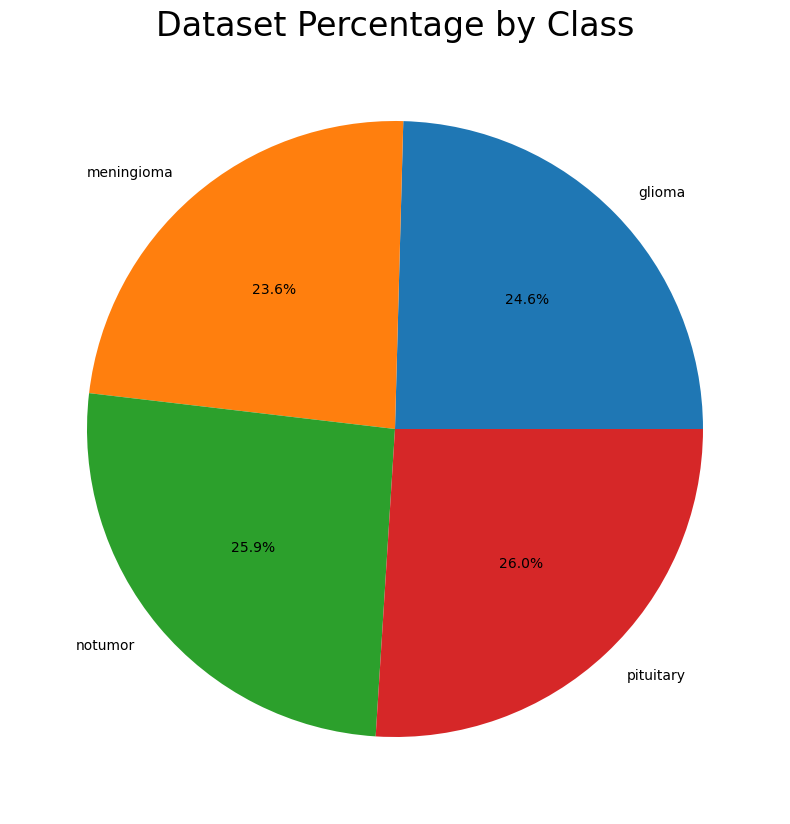

In [3]:
# Plot data distribution
plt.subplots(figsize=(10,10))
plt.style.use('ggplot')
labels, sizes = np.unique(df['Label'], return_counts=True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Dataset Percentage by Class', fontsize=24)
plt.show()


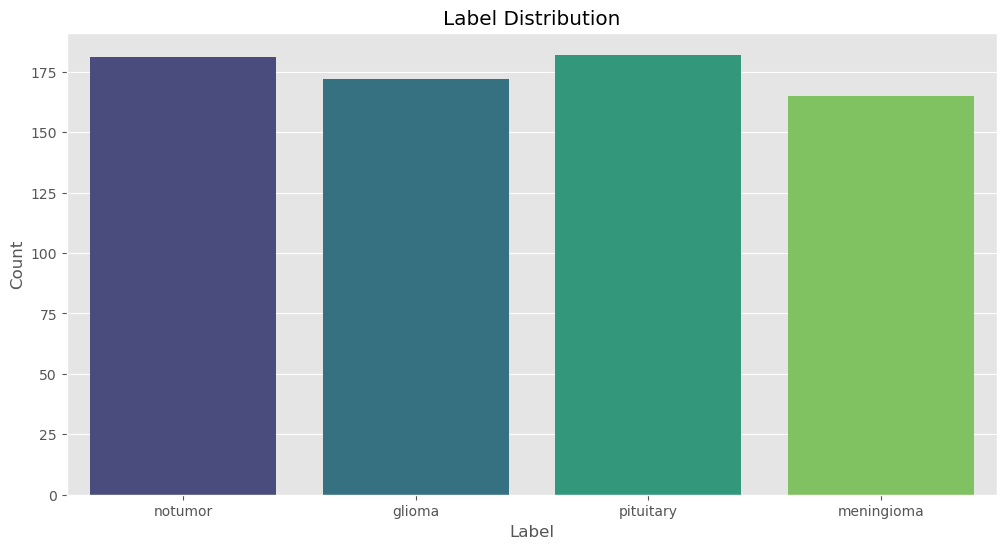

In [4]:
# Label count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [5]:
# Stratified split
X = df.drop(['Label'], axis=1).to_numpy()
y = df['Label']
X = X / 255.0 - 0.5  # Normalize pixel values
X1 = X.reshape((X.shape[0], 50, 50, 1))  # Reshape for image data
y1 = y.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, stratify=y, random_state=42)

# Save the split data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (560, 50, 50, 1)
X_test shape: (140, 50, 50, 1)
y_train shape: (560,)
y_test shape: (140,)


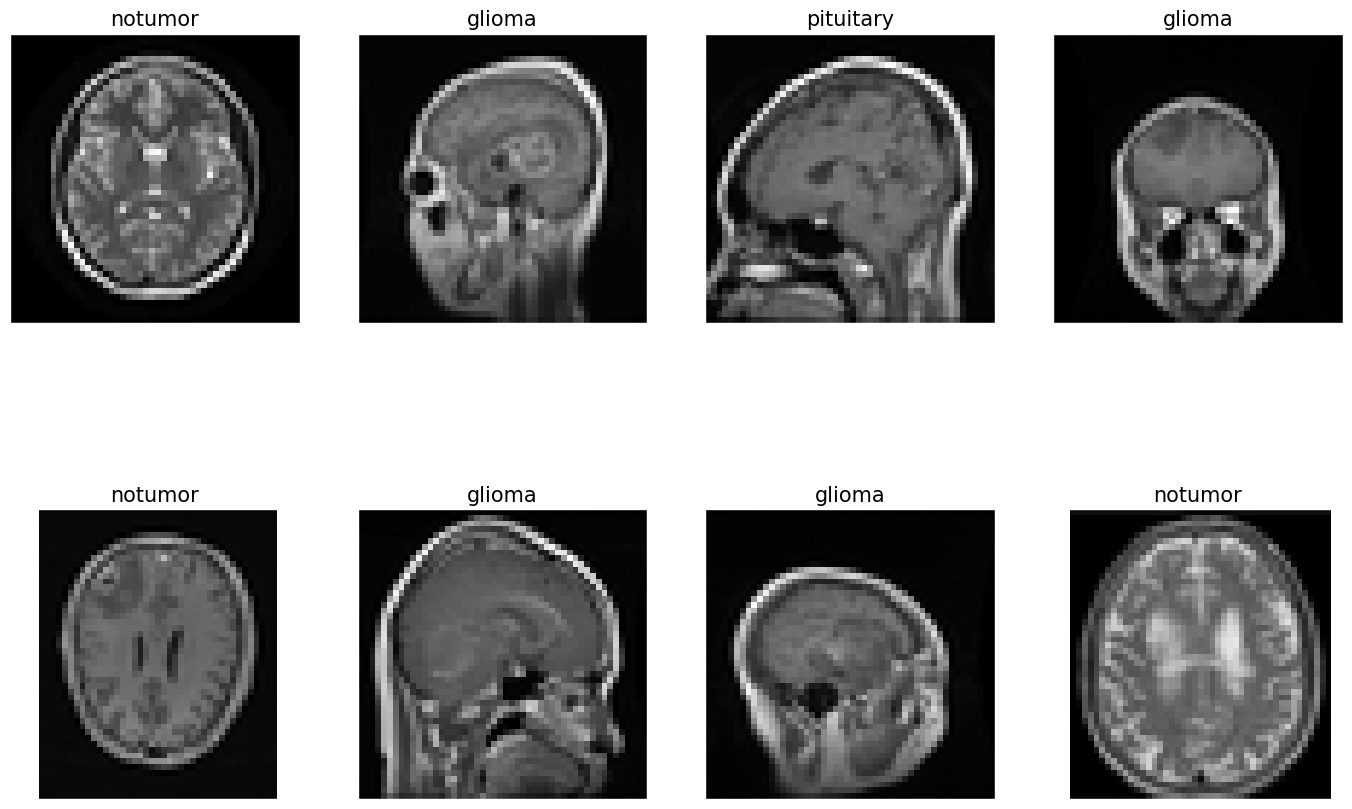

In [6]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=4):
    plt.figure(figsize=(3.4 * n_col, 4.6 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=15)
        plt.xticks(())
        plt.yticks(())

# Extract a sample of images and their corresponding labels for visualization
sample_images = X1[:8]  # Select the first 8 images
sample_titles = y1[:8]  # Select the first 8 labels

# Plot the sample images
plot_gallery(sample_images, sample_titles, 50, 50, n_row=2, n_col=4)

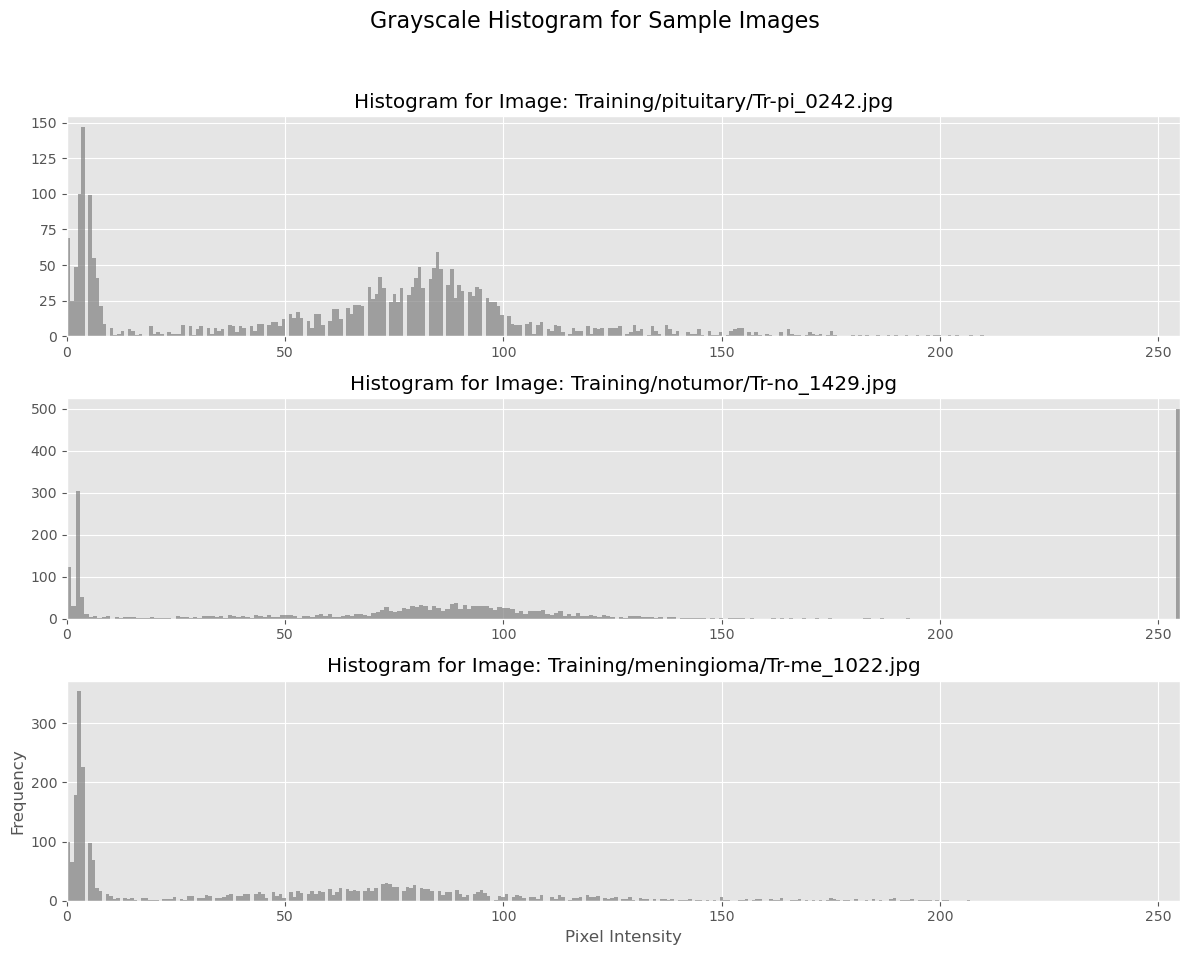

In [7]:
# Grayscale histogram for a few images
def plot_histograms(df, n_samples=3):
    fig, axes = plt.subplots(n_samples, 1, figsize=(12, 10))
    for i, (index, row) in enumerate(df.sample(n_samples, random_state=42).iterrows()):
        img_data = row.drop('Label').values
        axes[i].hist(img_data, bins=256, color='gray', alpha=0.7)
        axes[i].set_xlim(0, 255)
        axes[i].set_title(f'Histogram for Image: {index}')
    plt.suptitle('Grayscale Histogram for Sample Images', fontsize=16)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_histograms(df)
